## Transaction Success Rate Optimization - Data Preprocessing & Feature Engineering
### Author: Umar Kabir
#### Date: March 17, 2025

In [18]:
# import the necessary packages
import sys
import os

# Get the absolute path of the parent directory
sys.path.insert(0, os.path.abspath('../'))


from src.dependencies import *
from src.utils import *


### 1. Data Loading & Inspection
# ---------------------------------
Complete data overview with summary statistics  
Visualization of data distributions and missing values  
# ---------------------------------

In [20]:

try:
    # Attempt to load the data from a CSV file
    df = pd.read_csv('../data/raw/transactions_march_2023.csv')
    print("Data loaded successfully from CSV file.")
except FileNotFoundError:
    # If file not found, create a sample dataset for demonstration
    print("CSV file not found. Creating a sample dataset using data_generator.py in the src directory.")

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
display(df.head(25))

# Display dataset info
print("\nDataset information:")
display(df.info())

# Display summary statistics
print("\nSummary statistics:")
display(df.describe())

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values per column:\n{missing_values}")


Data loaded successfully from CSV file.

First few rows of the dataset:


,transaction_id,timestamp,merchant_id,customer_id,customer_location,payment_amount,payment_method,device_type,network_latency,result,processor_id,time_of_day,day_of_week,error_code,failure_reason,retry_count,regional_event
0,4ead8db0-c19c-4e9e-9156-6bf16a58ab00,2023-03-01 00:09:17,MERCH00079,CUST000074,urban,74.37,mobile_money,mobile,113.92,success,PROC003,00:09,Wednesday,NaN,NaN,0,NaN
1,bf69ef90-b811-4493-b6d0-35aab077774c,2023-03-01 00:35:13,MERCH00061,CUST000529,urban,28.49,credit_card,mobile,40.94,failure,PROC002,00:35,Wednesday,E005,Card expired,0,NaN
2,fb490f48-80bf-4c99-800a-541adb37e6c4,2023-03-01 01:07:06,MERCH00050,CUST000938,urban,33.64,credit_card,mobile,78.43,success,PROC002,01:07,Wednesday,NaN,NaN,0,NaN
3,64adba14-8825-4fe0-93a7-dde6995ba2dd,2023-03-01 01:29:33,MERCH00057,CUST000906,urban,39.44,debit_card,mobile,90.64,success,PROC002,01:29,Wednesday,NaN,NaN,0,NaN
4,9b745671-d0bd-426d-9487-fd27460e45fb,2023-03-01 02:15:54,MERCH00081,CUST000163,suburban,19.54,credit_card,mobile,43.50,success,PROC005,02:15,Wednesday,NaN,NaN,0,NaN
5,7936779b-c7d0-48ce-9898-7e3fd543ec7e,2023-03-01 02:26:48,MERCH00041,CUST000091,rural,25.82,credit_card,web,71.64,success,PROC002,02:26,Wednesday,NaN,NaN,0,NaN
6,d5ce1f80-d95b-4f58-9c2b-11607c3a5690,2023-03-01 03:37:11,MERCH00065,CUST000956,urban,20.38,credit_card,web,154.75,success,PROC001,03:37,Wednesday,NaN,NaN,0,NaN
7,c32d6b5c-15bb-4eda-9634-4a6a71dc6dfe,2023-03-01 03:48:23,MERCH00033,CUST000623,urban,100.77,credit_card,mobile,102.61,success,PROC002,03:48,Wednesday,NaN,NaN,0,NaN
8,0d188a0f-7f8a-483d-854f-f1c314c905cd,2023-03-01 04:31:23,MERCH00073,CUST000503,urban,94.84,mobile_money,mobile,97.74,success,PROC004,04:31,Wednesday,NaN,NaN,0,NaN
9,f99c31a1-93a7-4cdd-87e7-f3c80b76294e,2023-03-01 04:52:14,MERCH00065,CUST000956,urban,74.22,mobile_money,mobile,115.25,success,PROC003,04:52,Wednesday,NaN,NaN,0,NaN



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     5463 non-null   object 
 1   timestamp          5463 non-null   object 
 2   merchant_id        5463 non-null   object 
 3   customer_id        5463 non-null   object 
 4   customer_location  5463 non-null   object 
 5   payment_amount     5463 non-null   float64
 6   payment_method     5463 non-null   object 
 7   device_type        5463 non-null   object 
 8   network_latency    5463 non-null   float64
 9   result             5463 non-null   object 
 10  processor_id       5463 non-null   object 
 11  time_of_day        5463 non-null   object 
 12  day_of_week        5463 non-null   object 
 13  error_code         349 non-null    object 
 14  failure_reason     349 non-null    object 
 15  retry_count        5463 non-null   int64  
 16  re

None


Summary statistics:


,payment_amount,network_latency,retry_count
count,5463.000000,5463.000000,5463.000000
mean,55.253092,103.825272,0.038074
std,69.651820,84.590056,0.300762
min,0.630000,1.030000,0.000000
25%,16.675000,46.335000,0.000000
50%,33.370000,80.620000,0.000000
75%,66.560000,136.865000,0.000000
max,883.700000,691.150000,4.000000



Number of duplicate rows: 0

Missing values per column:
transaction_id          0
timestamp               0
merchant_id             0
customer_id             0
customer_location       0
payment_amount          0
payment_method          0
device_type             0
network_latency         0
result                  0
processor_id            0
time_of_day             0
day_of_week             0
error_code           5114
failure_reason       5114
retry_count             0
regional_event       4979
dtype: int64


### 2. Data Cleaning
# ---------------------------------
Missing value handling with appropriate techniques for each column  
Outlier detection and treatment using IQR and Z-score methods  
Data format standardization  
# ---------------------------------



Missing values count:
transaction_id          0
timestamp               0
merchant_id             0
customer_id             0
customer_location       0
payment_amount          0
payment_method          0
device_type             0
network_latency         0
result                  0
processor_id            0
time_of_day             0
day_of_week             0
error_code           5114
failure_reason       5114
retry_count             0
regional_event       4979
dtype: int64

Missing values percentage:
transaction_id        0.00
timestamp             0.00
merchant_id           0.00
customer_id           0.00
customer_location     0.00
payment_amount        0.00
payment_method        0.00
device_type           0.00
network_latency       0.00
result                0.00
processor_id          0.00
time_of_day           0.00
day_of_week           0.00
error_code           93.61
failure_reason       93.61
retry_count           0.00
regional_event       91.14
dtype: float64%


<Figure size 1200x600 with 0 Axes>

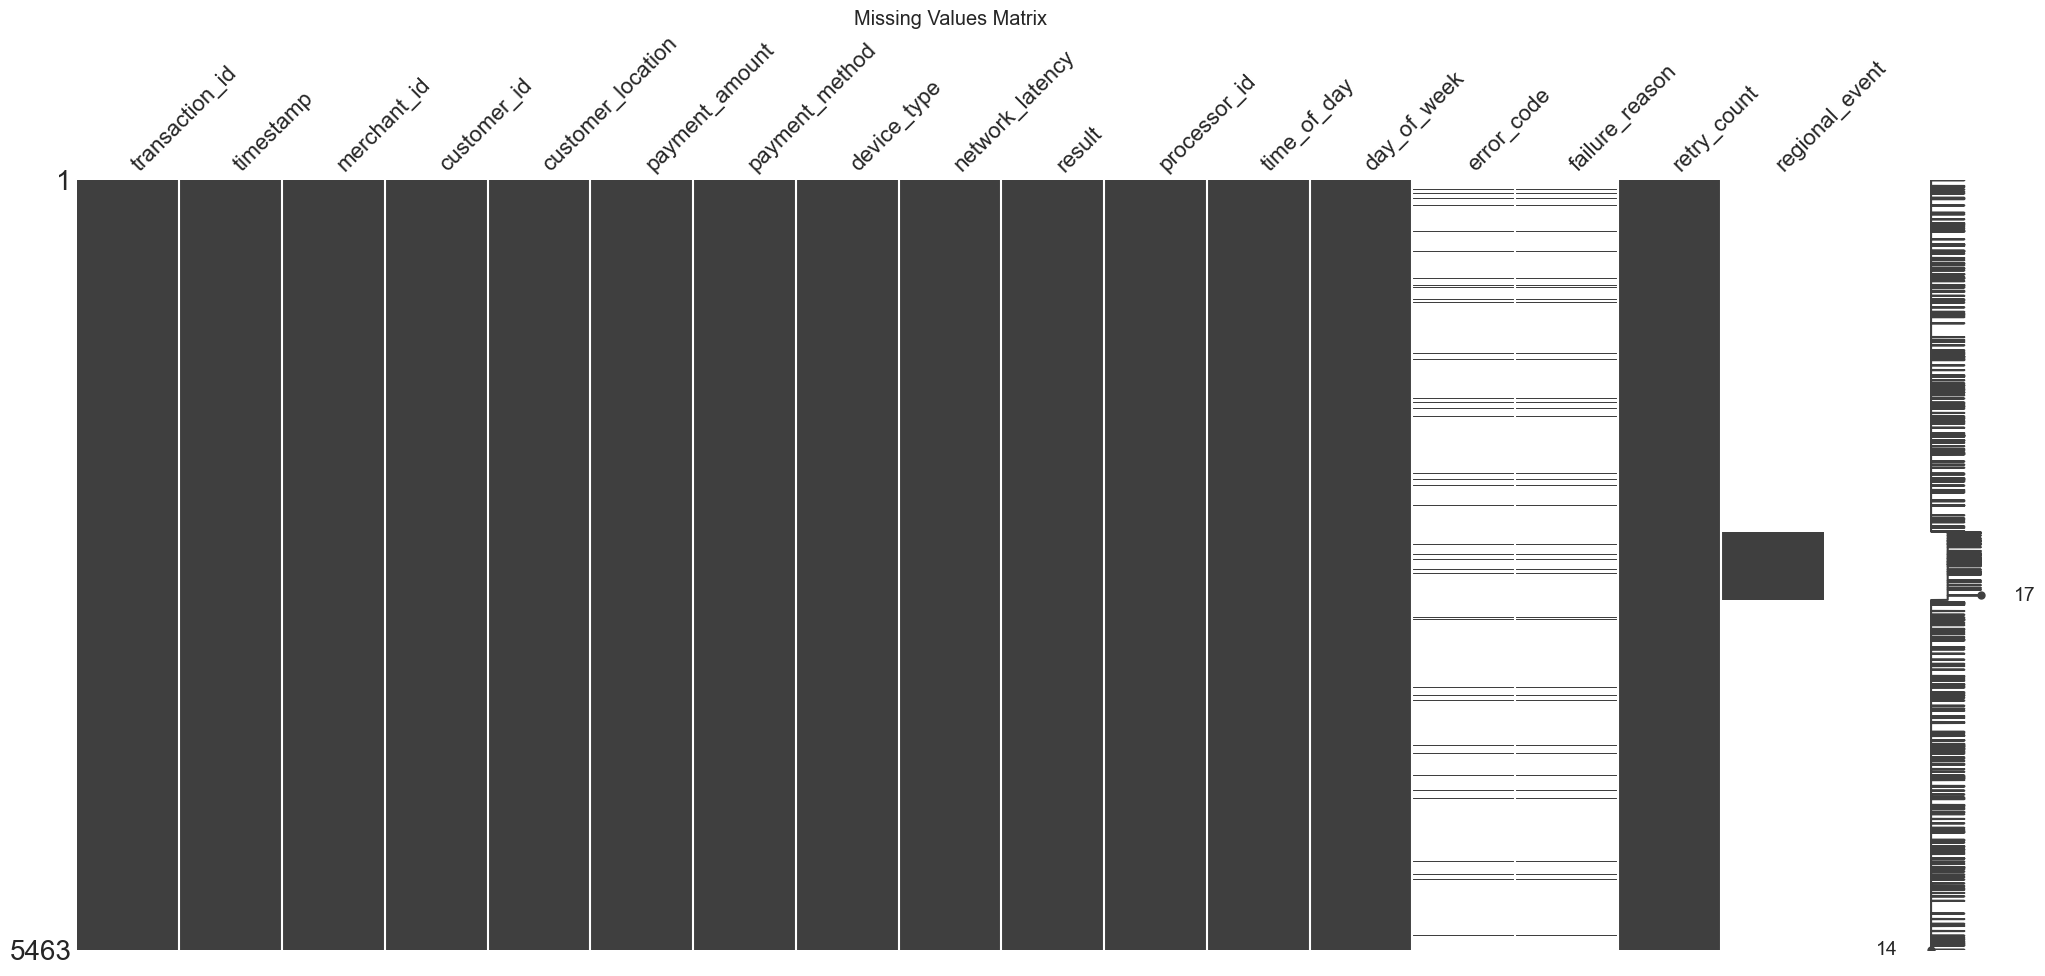

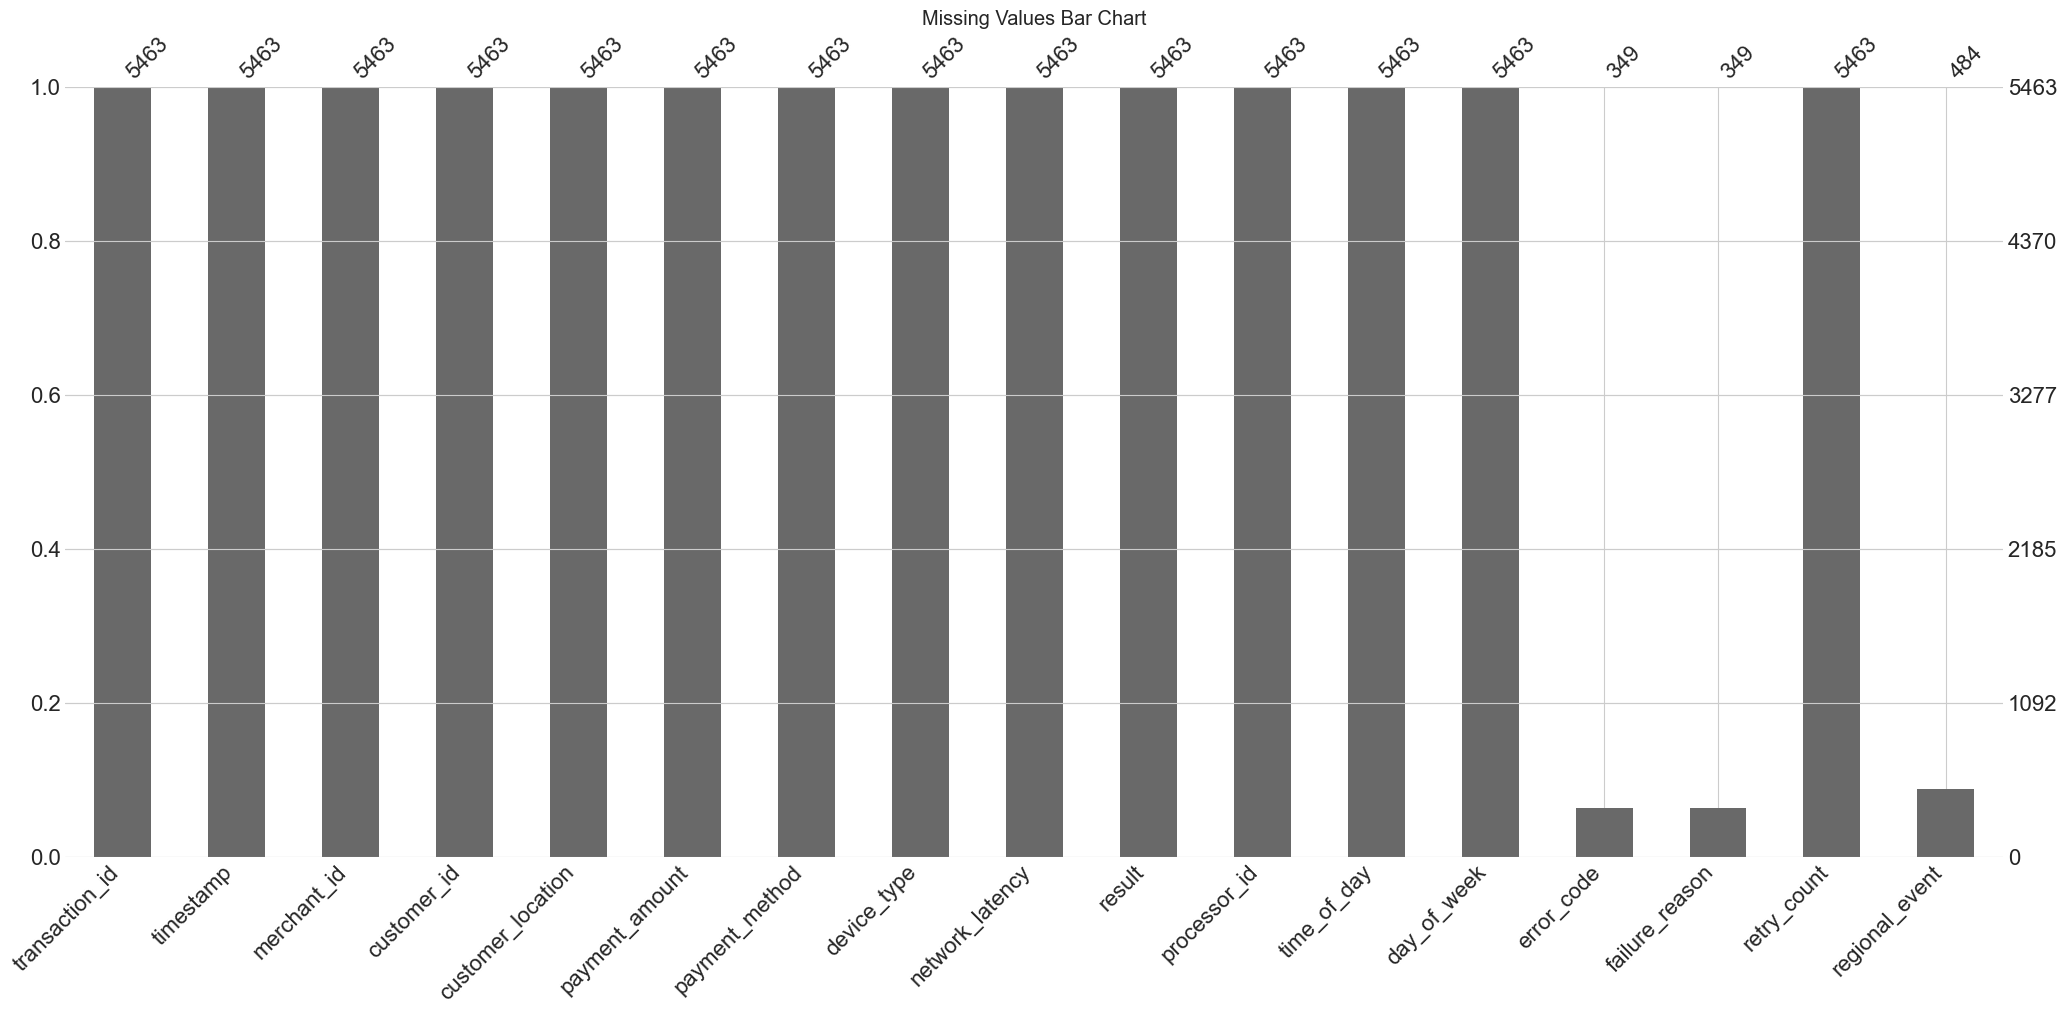


Handling missing values:

Remaining missing values:


transaction_id       0
timestamp            0
merchant_id          0
customer_id          0
customer_location    0
payment_amount       0
payment_method       0
device_type          0
network_latency      0
result               0
processor_id         0
time_of_day          0
day_of_week          0
error_code           0
failure_reason       0
retry_count          0
regional_event       0
dtype: int64

In [21]:
# 2.1 Handle Missing Values

# Visualize missing values
plot_missing_values(df)

# Handle missing values for each column
print("\nHandling missing values:")

# Define unique fill values for each column
fill_values = {
    'error_code': 'no_error',
    'failure_reason': 'no_failure',
    'regional_event': 'no_event'
}

# Apply the fill values
df.fillna(fill_values, inplace=True)

# Verify no missing values remain
print("\nRemaining missing values:")
display(df.isnull().sum())




Analyzing outliers in payment_amount:


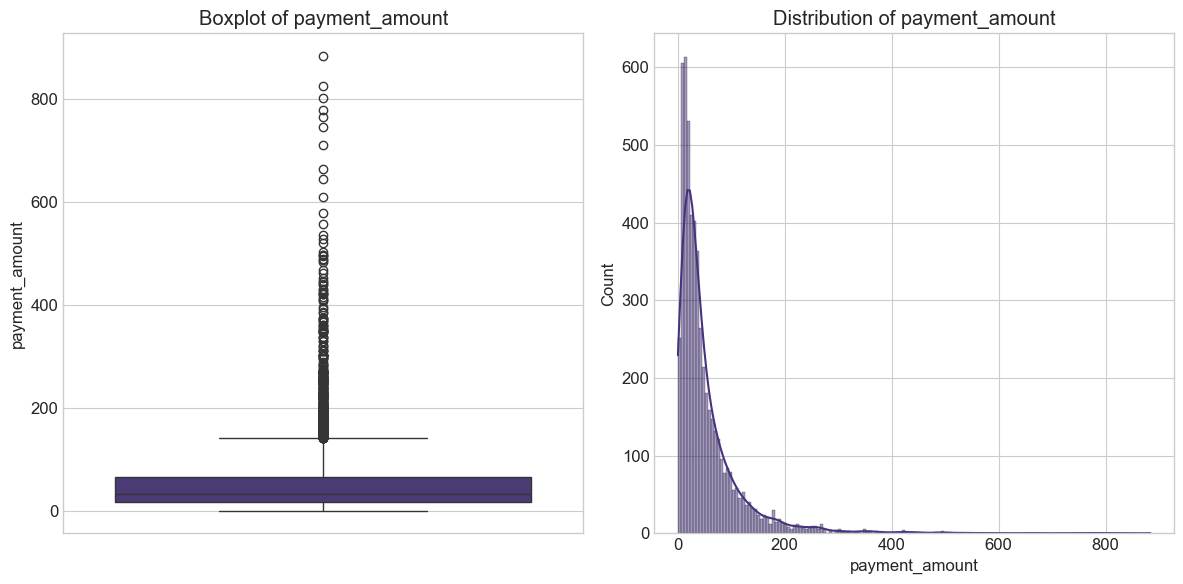

Number of outliers detected: 417
Percentage of outliers: 7.63%

Analyzing outliers in network_latency:


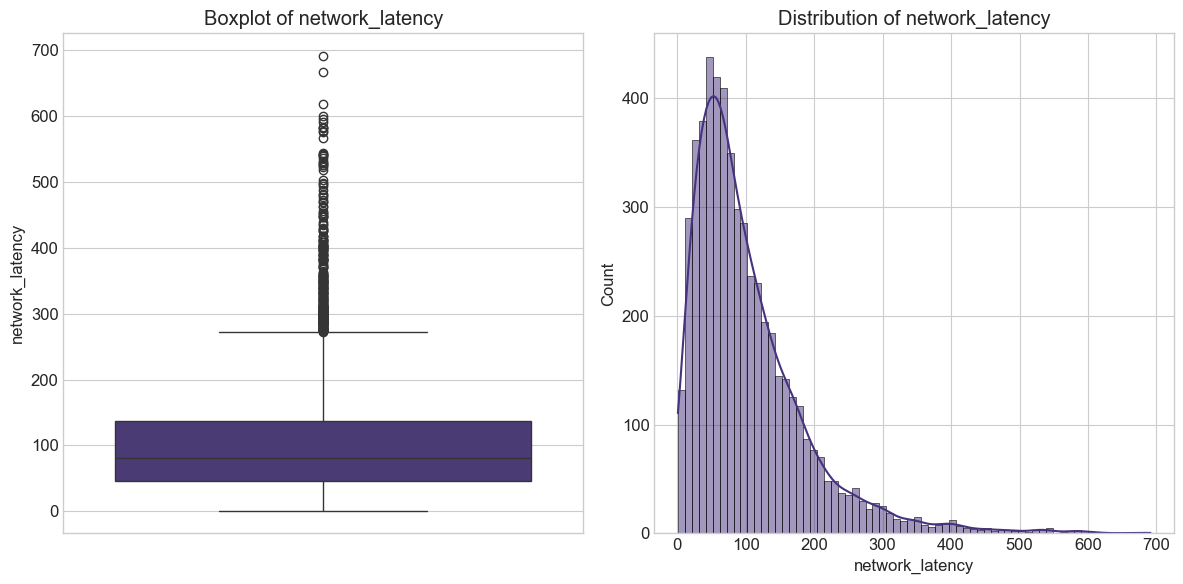

Number of outliers detected: 259
Percentage of outliers: 4.74%

Analyzing outliers in retry_count:


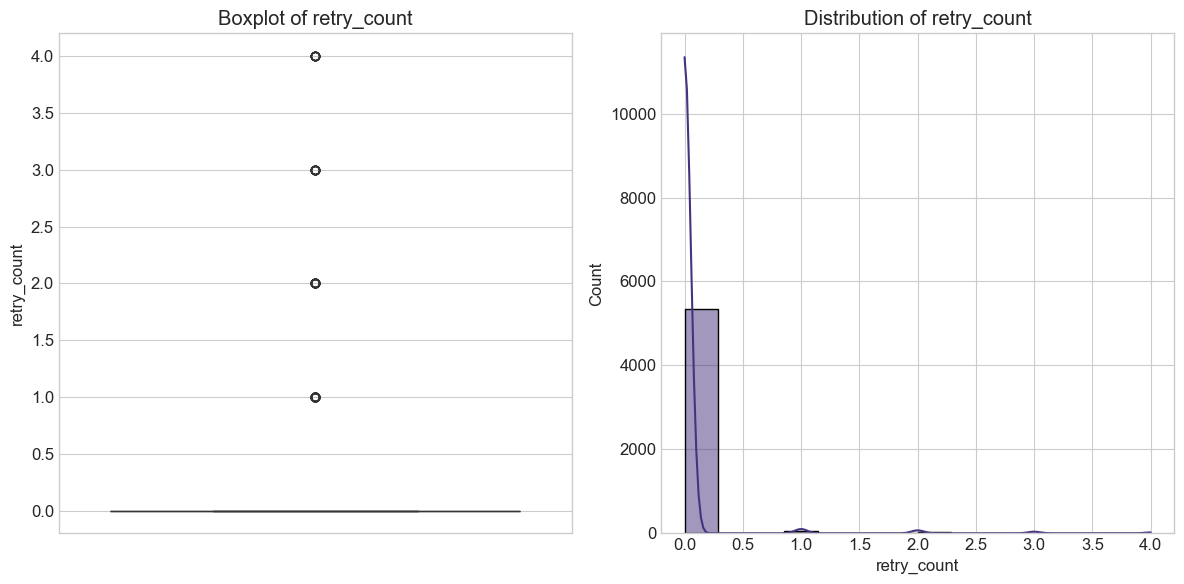

Number of outliers detected: 109
Percentage of outliers: 2.00%

Handling outliers in network_latency column:


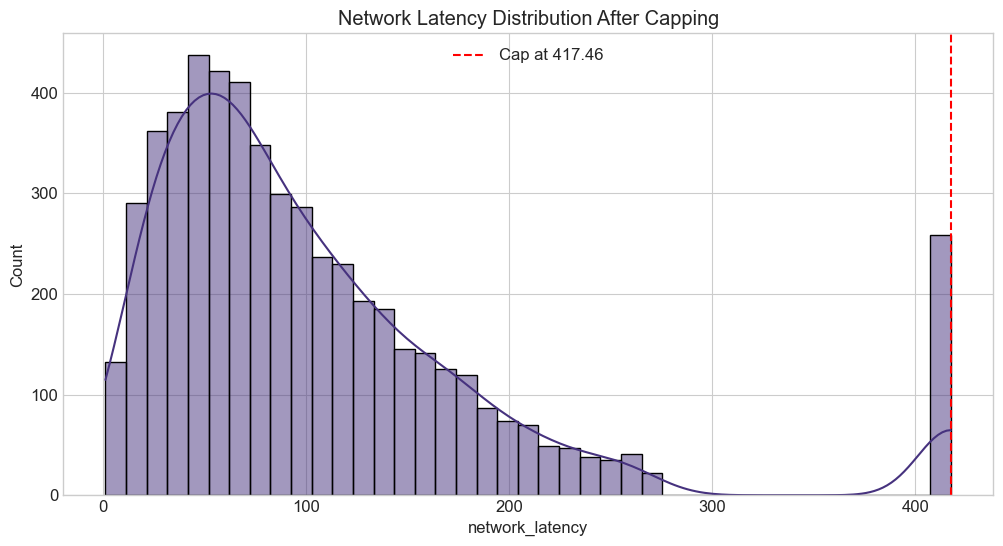

Capped network_latency outliers at 99th percentile: 417.46


In [22]:
# 2.2 Handle Outliers

# Detect and visualize outliers in numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numeric_cols:
    print(f"\nAnalyzing outliers in {col}:")
    plot_outliers(df, col, method='iqr')

# Handle outliers in amount column
if 'amount' in numeric_cols:
    print("\nHandling outliers in amount column:")
    
    # Before transformation
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['amount'], kde=True)
    plt.title('Amount Distribution Before Transformation')
    
    # Log transformation to handle skewness
    df['amount_log'] = np.log1p(df['amount'])
    
    # After transformation
    plt.subplot(1, 2, 2)
    sns.histplot(df['amount_log'], kde=True)
    plt.title('Amount Distribution After Log Transformation')
    plt.tight_layout()
    plt.show()
    
    print("Applied log transformation to amount column")

# Handle outliers in network_latency column
if 'network_latency' in numeric_cols:
    print("\nHandling outliers in network_latency column:")
    
    # Identify outliers
    outliers_mask = detect_outliers(df, 'network_latency', method='iqr', threshold=1.5)
    
    # Cap outliers at 99th percentile
    latency_cap = df['network_latency'].quantile(0.99)
    df.loc[outliers_mask, 'network_latency'] = latency_cap
    
    # Visualize after capping
    plt.figure(figsize=(12, 6))
    sns.histplot(df['network_latency'], kde=True)
    plt.axvline(latency_cap, color='red', linestyle='--', label=f'Cap at {latency_cap:.2f}')
    plt.legend()
    plt.title('Network Latency Distribution After Capping')
    plt.show()
    
    print(f"Capped network_latency outliers at 99th percentile: {latency_cap:.2f}")



In [23]:
# 2.3 Standardize Data Formats

# Convert timestamp to datetime if not already
if not pd.api.types.is_datetime64_any_dtype(df['timestamp']):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    print("\nConverted timestamp column to datetime format")

# Ensure categorical values are consistently formatted
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    if col not in ['transaction_id', 'merchant_id', 'customer_id']:  # Skip ID columns
        # Convert to lowercase and strip spaces
        df[col] = df[col].str.lower().str.strip()
        print(f"Standardized format for {col}")




Converted timestamp column to datetime format
Standardized format for customer_location
Standardized format for payment_method
Standardized format for device_type
Standardized format for result
Standardized format for processor_id
Standardized format for time_of_day
Standardized format for day_of_week
Standardized format for error_code
Standardized format for failure_reason
Standardized format for regional_event


### 3. Feature Engineering
# ---------------------------------
Transaction-based features (e.g., binned amounts, merchant statistics)  
Time-based features (e.g., hour of day, day of week, peak hours)  
Historical success rate patterns  
Network and system-based features  
Geographical and device-specific features  
# ---------------------------------



In [24]:

# 3.1 Transaction-Based Features

# Create binned version of payment_amount']

df['amount_bin'] = pd.qcut(df['payment_amount'], 
                           q=5, 
                           labels=['very_low', 'low', 'medium', 'high', 'very_high'])
print("\nCreated amount_bin feature with 5 quantile-based categories")

# Calculate merchant transaction frequency
merchant_freq = df.groupby('merchant_id').size().reset_index(name='merchant_transaction_count')
df = df.merge(merchant_freq, on='merchant_id', how='left')

# Calculate merchant result rate
# Direct mapping if the string values are exactly 'success' or 'failure'
df['result_numeric'] = df['result'].map({'success': 1, 'failure': 0})
merchant_success = df.groupby('merchant_id')['result_numeric'].mean().reset_index(name='merchant_success_rate')
df = df.merge(merchant_success, on='merchant_id', how='left')

# Calculate rolling average transaction payment_amount'], by merchant (last 10 transactions)
df = df.sort_values(['merchant_id', 'timestamp'])
df['merchant_rolling_avg_amount'] = df.groupby('merchant_id')['payment_amount'].transform(
    lambda x: x.rolling(window=10, min_periods=1).mean()
)

print("\nCreated merchant-based features:")
print("- merchant_transaction_count: Total transactions per merchant")
print("- merchant_success_rate: Average result rate per merchant")
print("- merchant_rolling_avg_amount: Rolling average of transaction amounts")



Created amount_bin feature with 5 quantile-based categories

Created merchant-based features:
- merchant_transaction_count: Total transactions per merchant
- merchant_success_rate: Average result rate per merchant
- merchant_rolling_avg_amount: Rolling average of transaction amounts



Created time-based features:
- hour: Hour of the day (0-23)
- day_of_week: Day of the week (0-6)
- day_name: Name of the day
- month: Month of the year
- is_weekend: Binary indicator for weekend
- time_of_day: Categorical time period
- hourly_transaction_volume: Transaction count by hour
- hourly_success_rate: Success rate by hour
- is_peak_hour: Binary indicator for peak transaction hours


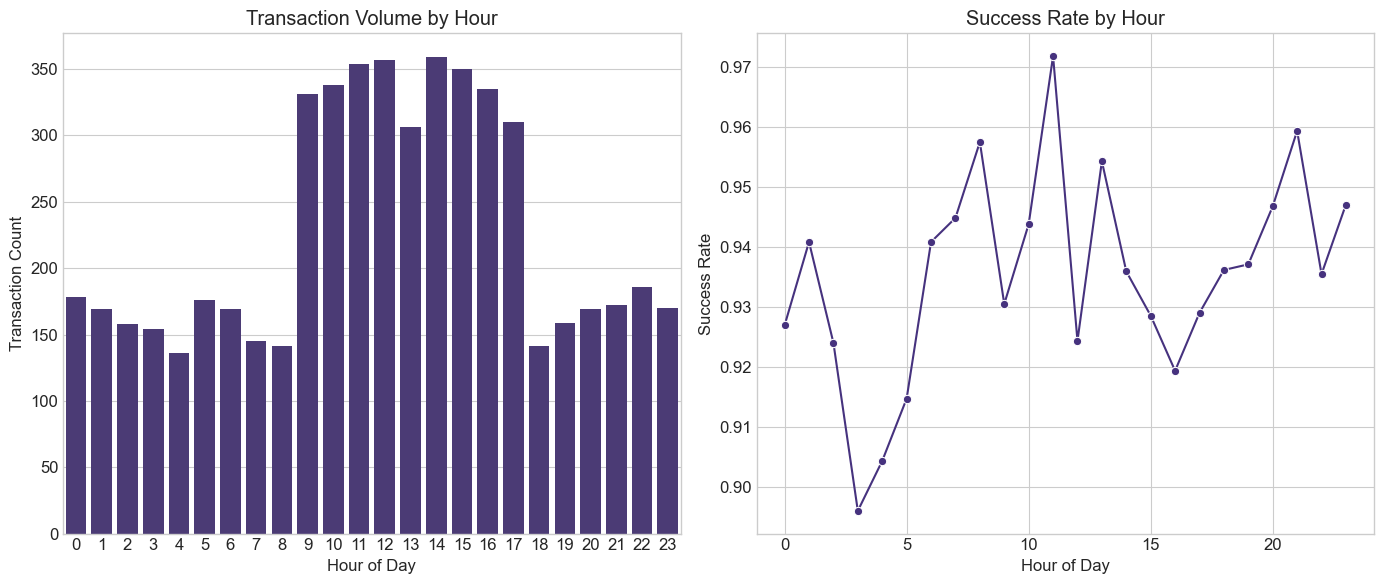

In [25]:
# 3.2 Time-Based Features

# Extract time components
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['day_name'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 1 for weekend, 0 for weekday

# Create time of day categories
time_bins = [0, 6, 12, 18, 24]
time_labels = ['night', 'morning', 'afternoon', 'evening']
df['time_of_day'] = pd.cut(df['hour'], bins=time_bins, labels=time_labels, right=False)

# Calculate hour-wise transaction volumes and result rates
hourly_stats = df.groupby('hour')['result_numeric'].agg(['count', 'mean']).reset_index()
hourly_stats.columns = ['hour', 'hourly_transaction_volume', 'hourly_success_rate']

# Merge hourly stats back to the main dataframe
df = df.merge(hourly_stats, on='hour', how='left')

# Identify peak hours (hours with transaction volume > 75th percentile)
peak_volume_threshold = hourly_stats['hourly_transaction_volume'].quantile(0.75)
peak_hours = hourly_stats[hourly_stats['hourly_transaction_volume'] > peak_volume_threshold]['hour'].tolist()
df['is_peak_hour'] = df['hour'].isin(peak_hours).astype(int)

print("\nCreated time-based features:")
print("- hour: Hour of the day (0-23)")
print("- day_of_week: Day of the week (0-6)")
print("- day_name: Name of the day")
print("- month: Month of the year")
print("- is_weekend: Binary indicator for weekend")
print("- time_of_day: Categorical time period")
print("- hourly_transaction_volume: Transaction count by hour")
print("- hourly_success_rate: Success rate by hour")
print("- is_peak_hour: Binary indicator for peak transaction hours")

# Visualize hourly patterns
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='hour', y='hourly_transaction_volume', data=hourly_stats, ax=ax1)
ax1.set_title('Transaction Volume by Hour')
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Transaction Count')

ax2 = plt.subplot(1, 2, 2)
sns.lineplot(x='hour', y='hourly_success_rate', data=hourly_stats, marker='o', ax=ax2)
ax2.set_title('Success Rate by Hour')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Success Rate')
plt.tight_layout()
plt.show()



In [26]:
# 3.3 Historical Success Rates

# Calculate rolling success rates for payment methods
df = df.sort_values(['payment_method', 'timestamp'])
df['payment_method_rolling_success'] = df.groupby('payment_method')['result_numeric'].transform(
    lambda x: x.rolling(window=50, min_periods=5).mean()
)

# Calculate processor-specific success rates
processor_success = df.groupby('processor_id')['result_numeric'].mean().reset_index(name='processor_success_rate')
df = df.merge(processor_success, on='processor_id', how='left')

# Calculate device type success rates
device_success = df.groupby('device_type')['result_numeric'].mean().reset_index(name='device_success_rate')
df = df.merge(device_success, on='device_type', how='left')

print("\nCreated historical success rate features:")
print("- payment_method_rolling_success: Rolling success rate by payment method")
print("- processor_success_rate: Average success rate by processor")
print("- device_success_rate: Average success rate by device type")


Created historical success rate features:
- payment_method_rolling_success: Rolling success rate by payment method
- processor_success_rate: Average success rate by processor
- device_success_rate: Average success rate by device type



Created network and system-based features:
- latency_bin: Categorized network latency
- latency_bin_success_rate: Success rate by latency category
- has_retry: Binary indicator for retry attempts


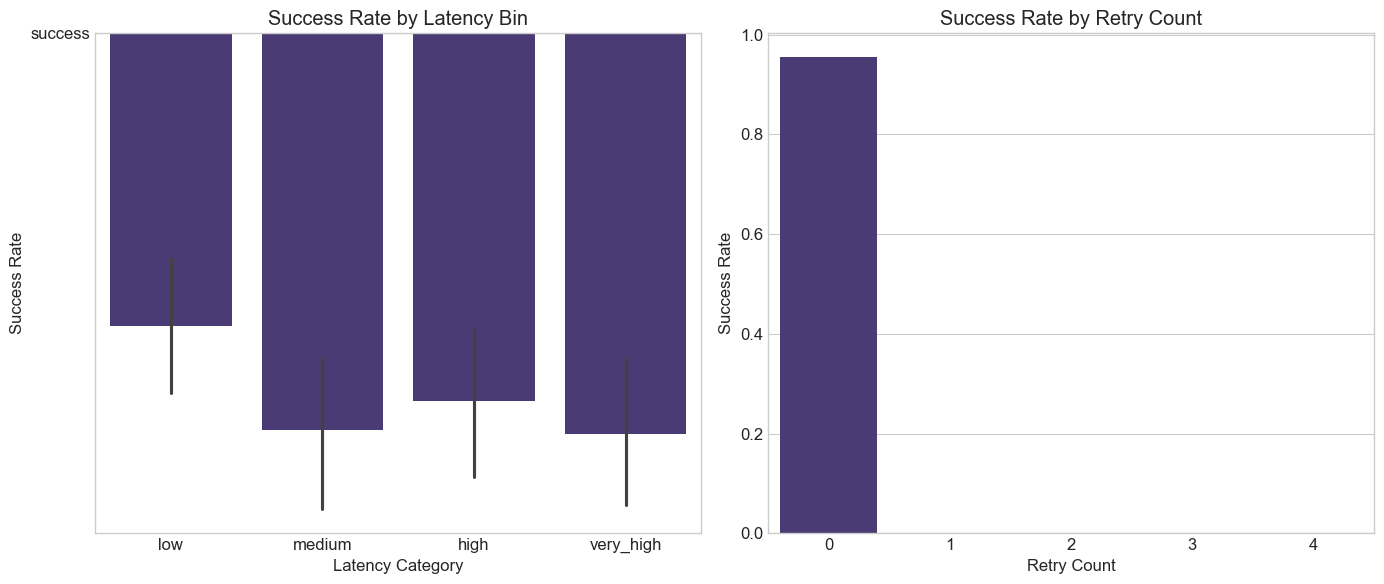

In [30]:
# 3.4 Network & System-Based Features

# Bin network latency into categories
df['latency_bin'] = pd.qcut(df['network_latency'],
                           q=4,
                           labels=['low', 'medium', 'high', 'very_high'])

# Calculate success rate by latency bin
latency_success = df.groupby('latency_bin')['result_numeric'].mean().reset_index(name='latency_bin_success_rate')
df = df.merge(latency_success, on='latency_bin', how='left')

# Create features based on retry counts
df['has_retry'] = (df['retry_count'] > 0).astype(int)

print("\nCreated network and system-based features:")
print("- latency_bin: Categorized network latency")
print("- latency_bin_success_rate: Success rate by latency category")
print("- has_retry: Binary indicator for retry attempts")

# Visualize success rate by latency and retry count
plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='latency_bin', y='result', data=df, ax=ax1)
ax1.set_title('Success Rate by Latency Bin')
ax1.set_xlabel('Latency Category')
ax1.set_ylabel('Success Rate')

ax2 = plt.subplot(1, 2, 2)
retry_success = df.groupby('retry_count')['result_numeric'].mean().reset_index()
sns.barplot(x='retry_count', y='result_numeric', data=retry_success, ax=ax2)
ax2.set_title('Success Rate by Retry Count')
ax2.set_xlabel('Retry Count')
ax2.set_ylabel('Success Rate')
plt.tight_layout()
plt.show()



In [31]:
# 3.5 Geographical & Device Features

# Calculate location-based success rates
location_success = df.groupby('customer_location')['result_numeric'].mean().reset_index(name='location_success_rate')
df = df.merge(location_success, on='customer_location', how='left')

# Calculate payment method success rates by location
payment_location_success = df.groupby(['payment_method', 'customer_location'])['result_numeric'].mean().reset_index(
    name='payment_location_success_rate')
df = df.merge(payment_location_success, on=['payment_method', 'customer_location'], how='left')

print("\nCreated geographical and device features:")
print("- location_success_rate: Success rate by customer location")
print("- payment_location_success_rate: Success rate by payment method and location")



Created geographical and device features:
- location_success_rate: Success rate by customer location
- payment_location_success_rate: Success rate by payment method and location


### 4. Feature Encoding & Scaling
# ---------------------------------
One-hot encoding for nominal categories  
Ordinal encoding for ordered categories  
Appropriate scaling for numerical features (StandardScaler, MinMaxScaler)  
Log transformations for skewed distributions  
# ---------------------------------



In [ ]:

# 4.1 Categorical Encoding

# Identify categorical columns to encode
categorical_cols = ['payment_method', 'customer_location', 
                    'device_type', 'amount_bin', 'time_of_day', 'latency_bin', 'day_name']

# One-hot encoding for nominal categories
print("\nPerforming one-hot encoding for nominal categories:")
nominal_cols = ['payment_method', 'device_type', 'time_of_day', 'day_name']

# Create a copy of the dataframe for encoding
df_encoded = df.copy()

# Apply one-hot encoding
for col in nominal_cols:
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=False)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    print(f"- Encoded {col} into {dummies.shape[1]} dummy variables")

# Ordinal encoding for ordered categories
ordinal_cols = ['amount_bin', 'latency_bin']
ordinal_mappings = {
    'amount_bin': {'very_low': 1, 'low': 2, 'medium': 3, 'high': 4, 'very_high': 5},
    'latency_bin': {'low': 1, 'medium': 2, 'high': 3, 'very_high': 4}
}

for col in ordinal_cols:
    df_encoded[f'{col}_encoded'] = df_encoded[col].map(ordinal_mappings[col])
    print(f"- Applied ordinal encoding to {col}")




Performing one-hot encoding for nominal categories:
- Encoded payment_method into 5 dummy variables
- Encoded device_type into 4 dummy variables
- Encoded time_of_day into 4 dummy variables
- Encoded day_name into 7 dummy variables
- Applied ordinal encoding to amount_bin
- Applied ordinal encoding to latency_bin
- Applied Standard Scaling to network_latency
- Applied MinMax Scaling to merchant_rolling_avg_amount
- Applied MinMax Scaling to merchant_success_rate
- Applied MinMax Scaling to device_success_rate
- Applied MinMax Scaling to payment_method_rolling_success
- Applied MinMax Scaling to location_success_rate
- Applied MinMax Scaling to payment_location_success_rate
- Applied log transformation to merchant_transaction_count
- Applied log transformation to hourly_transaction_volume

Feature encoding and scaling completed.


In [ ]:
# 4.2 Numerical Feature Scaling

# Identify numeric columns to scale
numeric_cols_to_scale = ['amount', 'amount_log', 'network_latency', 'merchant_rolling_avg_amount', 
                         'hourly_transaction_volume', 'merchant_success_rate', 'customer_success_rate',
                         'device_success_rate', 'payment_method_rolling_success', 'location_success_rate',
                         'payment_location_success_rate']

# Create scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply Standard Scaling to amount_log and network_latency
for col in ['amount_log', 'network_latency']:
    if col in df_encoded.columns:
        df_encoded[f'{col}_scaled'] = standard_scaler.fit_transform(df_encoded[[col]])
        print(f"- Applied Standard Scaling to {col}")

# Apply MinMax Scaling to success rate features
for col in [c for c in numeric_cols_to_scale if 'success_rate' in c or 'rolling' in c]:
    if col in df_encoded.columns:
        df_encoded[f'{col}_scaled'] = minmax_scaler.fit_transform(df_encoded[[col]])
        print(f"- Applied MinMax Scaling to {col}")

# Apply log transformation to highly skewed features
skewed_cols = ['amount', 'merchant_transaction_count', 'hourly_transaction_volume']
for col in skewed_cols:
    if col in df_encoded.columns and col != 'amount_log':  # Skip amount as we already transformed it
        df_encoded[f'{col}_log'] = np.log1p(df_encoded[col])
        print(f"- Applied log transformation to {col}")

print("\nFeature encoding and scaling completed.")


### Feature Selection
# ---------------------------------
Correlation analysis with heatmap visualization  
SHAP value analysis for feature importance  
Recursive Feature Elimination (RFE)  
Combined approach for final feature selection  
# ---------------------------------


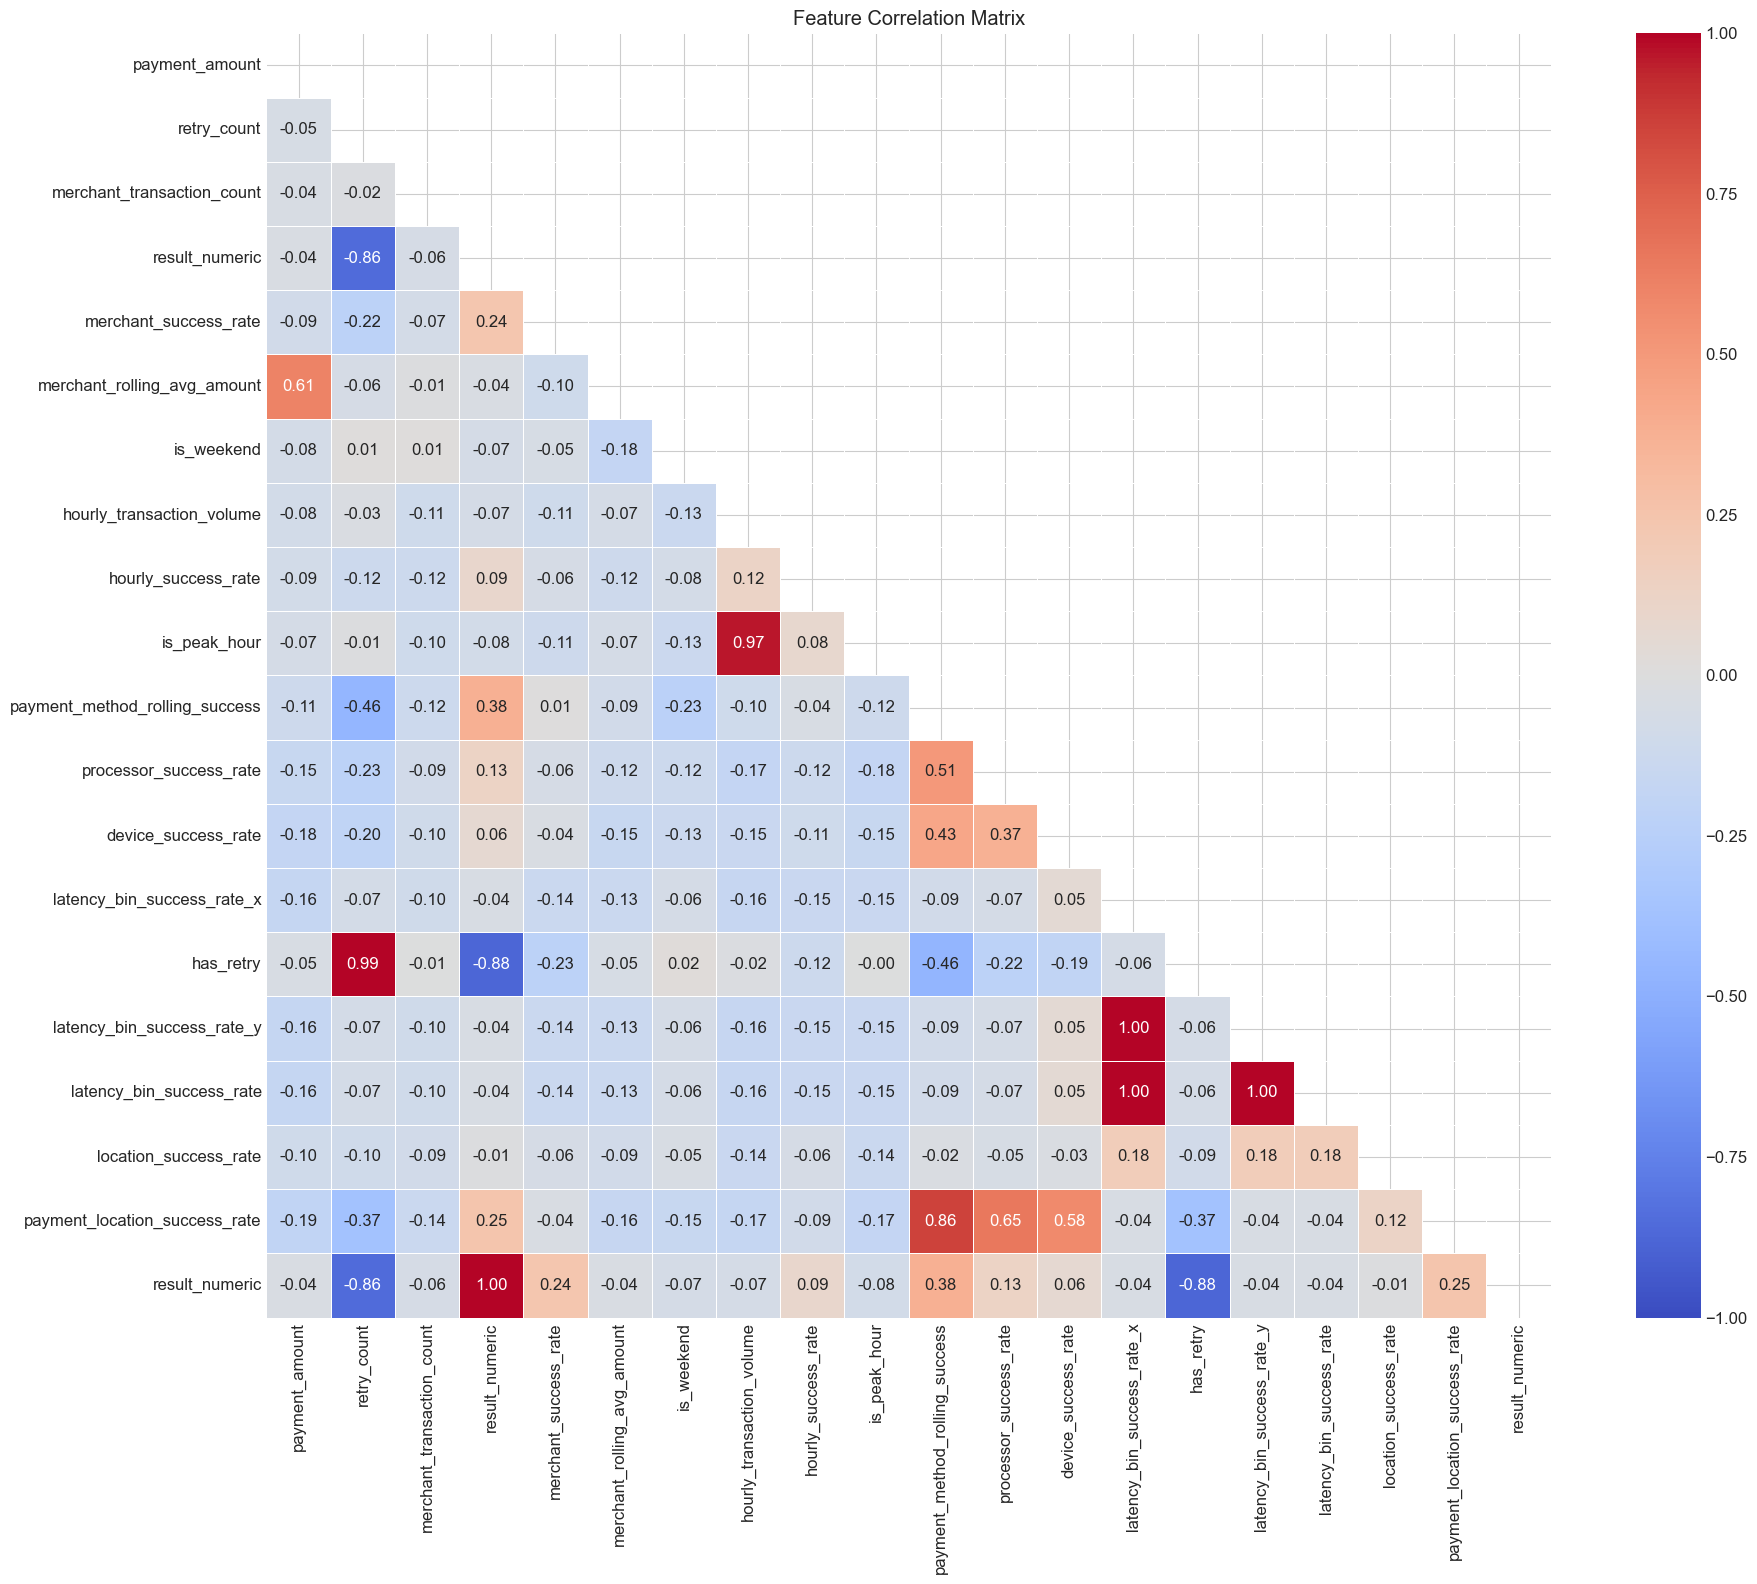


Highly correlated feature pairs:
- retry_count and has_retry: 0.89
- hourly_transaction_volume and is_peak_hour: 0.78
- latency_bin_success_rate_x and latency_bin_success_rate_y: 1.00
- latency_bin_success_rate_x and latency_bin_success_rate: 1.00
- latency_bin_success_rate_y and latency_bin_success_rate: 1.00


In [46]:
# 5.1 Correlation Analysis

# Select numerical columns for correlation analysis
numeric_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude the original columns that have been transformed or scaled
exclude_cols = {'amount', 'network_latency'}  
exclude_cols.update([col for col in numeric_features if col.endswith(('_encoded', '_scaled', '_log'))])

numeric_features = [col for col in numeric_features if col not in exclude_cols]

# Ensure 'result_numeric' is in the dataframe before correlation analysis
if 'result_numeric' not in df_encoded.columns:
    raise KeyError("Column 'result_numeric' not found in df_encoded.")

# Calculate correlation matrix
correlation_matrix = df_encoded[numeric_features + ['result_numeric']].corr()

# Plot correlation matrix
plot_correlation_matrix(correlation_matrix)  # Fixed: Now passing the actual correlation matrix

# Identify highly correlated features
corr_threshold = 0.7
high_corr_pairs = []

for i in range(len(numeric_features)):
    for j in range(i + 1, len(numeric_features)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > corr_threshold:
            high_corr_pairs.append((numeric_features[i], numeric_features[j], corr_value))

# Print highly correlated feature pairs
if high_corr_pairs:
    print("\nHighly correlated feature pairs:")
    for col1, col2, corr in high_corr_pairs:
        print(f"- {col1} and {col2}: {corr:.2f}")
else:
    print("\nNo highly correlated feature pairs found above the threshold.")



Calculating SHAP values (this may take a moment)...
Shape of X: (5463, 35)
Type of shap_values: <class 'numpy.ndarray'>
Shape of shap_values: (5463, 35, 2)


<Figure size 1200x1000 with 0 Axes>

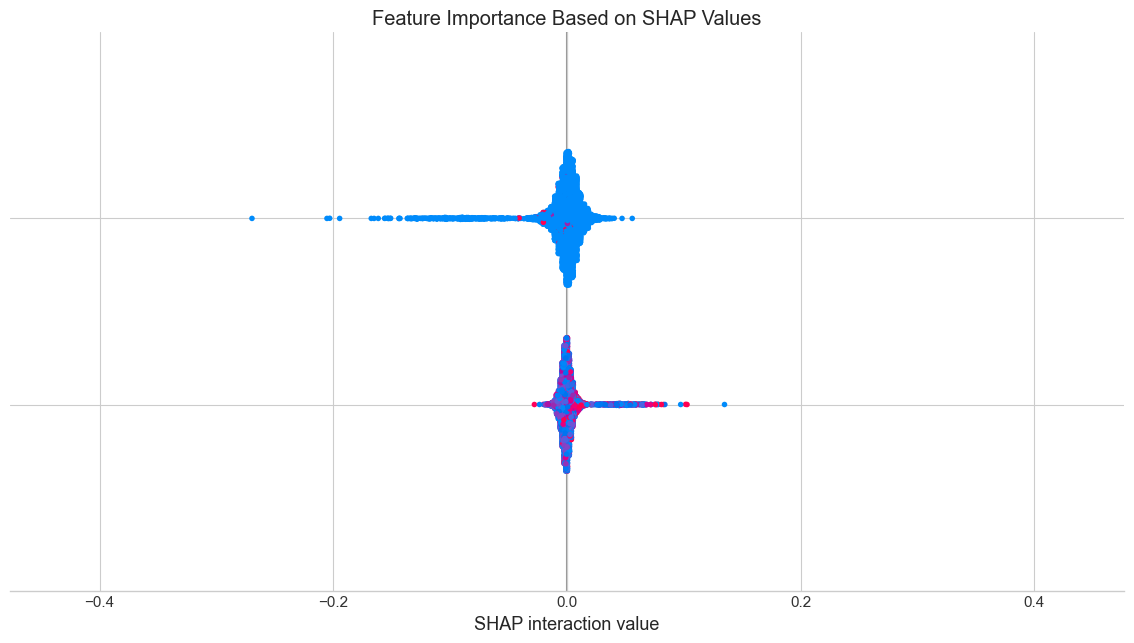

Error calculating feature importance: All arrays must be of the same length

Trying alternative approach for feature importance...

Feature importance based on model's feature_importances_:


,Feature,Importance
1,retry_count,0.141536
12,has_retry,0.122258
0,network_latency_scaled,0.092756
5,merchant_success_rate_scaled,0.086861
9,merchant_transaction_count_log,0.064904
2,hour,0.061315
11,amount_bin_encoded,0.041945
6,payment_method_rolling_success_scaled,0.038266
13,payment_method_rolling_success,0.036948
34,payment_method_rolling_success_scaled,0.036664


In [50]:
# 5.2 SHAP Value Analysis
# Prepare data for SHAP analysis
# Select features for modeling
features_for_model = [
    'amount_log_scaled', 'network_latency_scaled', 'retry_count', 'hour', 'is_weekend',
    'is_peak_hour', 'merchant_success_rate_scaled', 'customer_success_rate_scaled',
    'payment_method_rolling_success_scaled', 'location_success_rate_scaled',
    'payment_location_success_rate_scaled', 'merchant_transaction_count_log',
    'latency_bin_encoded', 'amount_bin_encoded', 'has_retry'
]
# Add one-hot encoded columns
onehot_cols = [col for col in df_encoded.columns if col.startswith(tuple(nominal_cols))
               and col not in nominal_cols]
features_for_model.extend(onehot_cols)
# Ensure all features are present in the dataframe
features_for_model = [col for col in features_for_model if col in df_encoded.columns]
# Select features and target
X = df_encoded[features_for_model]
y = df_encoded['result_numeric']

# Train a Random Forest model for SHAP analysis
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Create a SHAP explainer and calculate SHAP values
print("\nCalculating SHAP values (this may take a moment)...")
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Print shapes to debug
print(f"Shape of X: {X.shape}")
print(f"Type of shap_values: {type(shap_values)}")
if isinstance(shap_values, list):
    print(f"Length of shap_values list: {len(shap_values)}")
    for i, sv in enumerate(shap_values):
        print(f"Shape of shap_values[{i}]: {sv.shape}")
else:
    print(f"Shape of shap_values: {shap_values.shape}")

# Plot SHAP summary
plt.figure(figsize=(12, 10))
try:
    # For binary classification
    if isinstance(shap_values, list) and len(shap_values) == 2:
        # Plot only for the positive class (index 1)
        shap.summary_plot(shap_values[1], X, plot_type='bar', show=False)
    else:
        # For regression or other cases
        shap.summary_plot(shap_values, X, plot_type='bar', show=False)
    
    plt.title('Feature Importance Based on SHAP Values')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting SHAP summary: {e}")

# Calculate feature importance
try:
    # For binary classification
    if isinstance(shap_values, list) and len(shap_values) == 2:
        # Use only the positive class values
        importance_values = np.abs(shap_values[1]).mean(axis=0)
    else:
        # For regression or other cases
        importance_values = np.abs(shap_values).mean(axis=0)
    
    # Ensure importance_values is 1D
    if importance_values.ndim > 1:
        importance_values = importance_values.flatten()
    
    # Create DataFrame with feature importance
    shap_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance_values
    })
    shap_importance = shap_importance.sort_values('Importance', ascending=False)
    print("\nFeature importance based on SHAP values:")
    display(shap_importance.head(15))
except Exception as e:
    print(f"Error calculating feature importance: {e}")
    
    # Alternative approach if the above fails
    print("\nTrying alternative approach for feature importance...")
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    print("\nFeature importance based on model's feature_importances_:")
    display(feature_importance.head(15))

Checking for missing values in X:
60
Missing values after imputation: 0

Features selected by RFE:
- retry_count
- merchant_success_rate_scaled
- payment_method_rolling_success_scaled
- payment_location_success_rate_scaled
- merchant_transaction_count_log
- has_retry
- payment_method_rolling_success
- payment_method_ussd
- device_type_mobile
- device_type_pos
- time_of_day_night
- time_of_day_afternoon
- day_name_Friday
- day_name_Tuesday
- payment_method_rolling_success_scaled


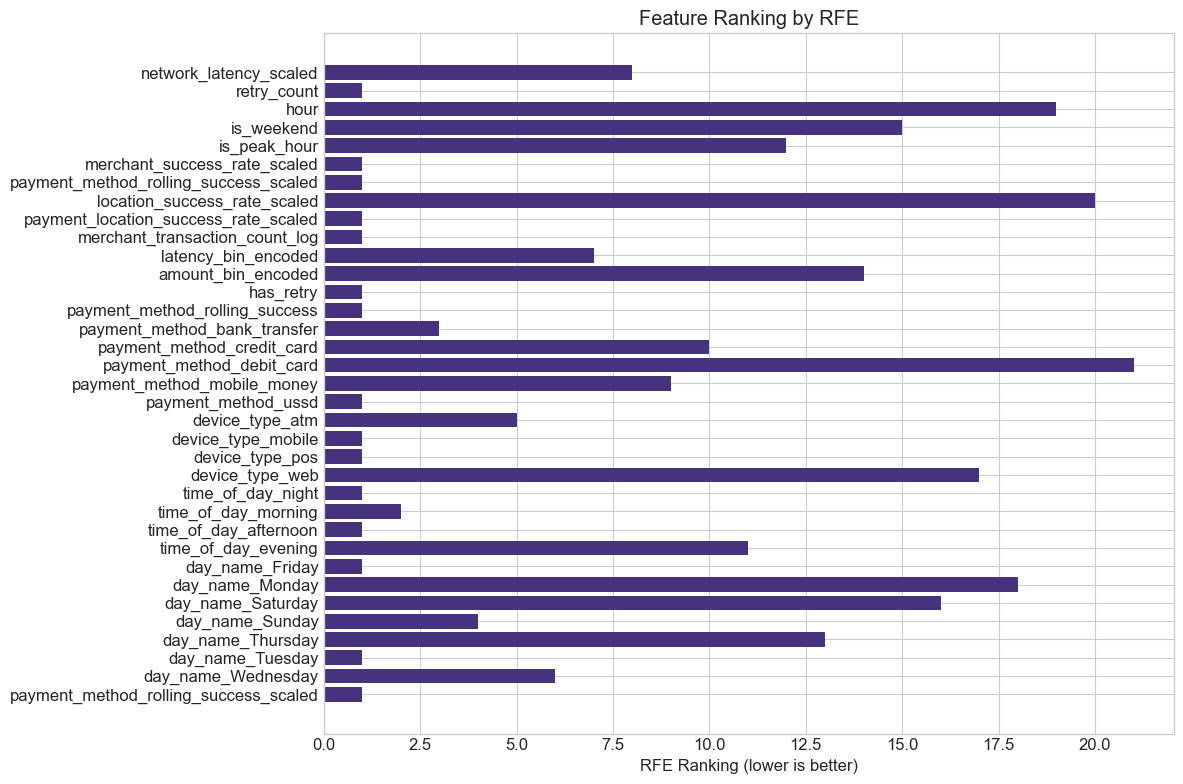


Final selected features:
- payment_method_rolling_success_scaled
- hour
- merchant_transaction_count_log
- payment_location_success_rate_scaled
- device_type_pos
- amount_bin_encoded
- device_type_mobile
- retry_count
- payment_method_ussd
- payment_method_rolling_success
- merchant_success_rate_scaled
- network_latency_scaled
- has_retry


In [53]:
# 5.3 Recursive Feature Elimination (RFE)
# First, handle missing values in the dataset
print("Checking for missing values in X:")
print(X.isna().sum().sum())

# Handle missing values (impute or drop)
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'

# Apply imputation
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verify no missing values remain
print("Missing values after imputation:", X_imputed.isna().sum().sum())

# Set the number of features to select
n_features_to_select = min(15, len(features_for_model))

# Create a base model
base_model = LogisticRegression(max_iter=1000, random_state=42)

# Create RFE model
rfe = RFE(estimator=base_model, n_features_to_select=n_features_to_select, step=1)

# Fit RFE on the imputed data
rfe.fit(X_imputed, y)

# Get selected features
selected_features = [features_for_model[i] for i in range(len(features_for_model)) if rfe.support_[i]]
print("\nFeatures selected by RFE:")
for feature in selected_features:
    print(f"- {feature}")

# Plot feature ranking
plt.figure(figsize=(12, 8))
plt.barh(range(len(rfe.ranking_)), rfe.ranking_)
plt.yticks(range(len(rfe.ranking_)), [features_for_model[i] for i in range(len(features_for_model))])
plt.xlabel('RFE Ranking (lower is better)')
plt.title('Feature Ranking by RFE')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Combine feature selection methods
# Get top 15 features from SHAP
top_shap_features = feature_importance['Feature'].head(15).tolist()

# Get final feature set (intersection of RFE and top SHAP features)
final_features = list(set(selected_features).intersection(set(top_shap_features)))

# If the intersection is too small, take the union of the top 10 features from each method
if len(final_features) < 10:
    final_features = list(set(selected_features[:10]).union(set(top_shap_features[:10])))

print("\nFinal selected features:")
for feature in final_features:
    print(f"- {feature}")

### 6. Dataset Export

# ---------------------------------
Export of processed dataset with selected features  
Export of full feature-engineered dataset
# ---------------------------------

In [54]:
# Create final dataset with selected features
final_df = df_encoded[final_features + ['result_numeric', 'transaction_id', 'timestamp']]

# Save to CSV
final_df.to_csv('../data/processed/processed_transaction_data.csv', index=False)
print("\nExported processed dataset to 'data/processed/processed_transaction_data.csv'")

# Optional: Save the full feature-engineered dataset
df_encoded.to_csv('../data/processed/full_feature_engineered_data.csv', index=False)
print("Exported full feature-engineered dataset to 'data/processed/full_feature_engineered_data.csv'")



Exported processed dataset to 'data/processed/processed_transaction_data.csv'
Exported full feature-engineered dataset to 'data/processed/full_feature_engineered_data.csv'



# ---------------------------------
### 7. Summary and Next Steps
# ---------------------------------



=== Data Preprocessing and Feature Engineering Summary ===
Original dataset shape: (5463, 39)
Processed dataset shape: (5463, 16)
Number of features selected: 13

Preprocessing steps completed:
- Handled missing values
- Cleaned and standardized data formats
- Handled outliers

Feature engineering steps completed:
- Created transaction-based features
- Created time-based features
- Created historical success rate features
- Created network and system-based features
- Created geographical and device features

Feature selection methods applied:
- Correlation analysis
- SHAP value analysis
- Recursive Feature Elimination

Next steps:
- Proceed with model training and evaluation
- Implement model validation techniques
- Develop a model deployment strategy

Correlation of final features with success:


result_numeric                           1.000000
payment_method_rolling_success           0.202441
payment_method_rolling_success_scaled    0.202441
merchant_success_rate_scaled             0.133731
payment_location_success_rate_scaled     0.131763
amount_bin_encoded                       0.025334
hour                                     0.017867
device_type_pos                          0.008500
merchant_transaction_count_log          -0.003978
network_latency_scaled                  -0.027239
device_type_mobile                      -0.037561
payment_method_ussd                     -0.103674
retry_count                             -0.484637
has_retry                               -0.546187
Name: result_numeric, dtype: float64

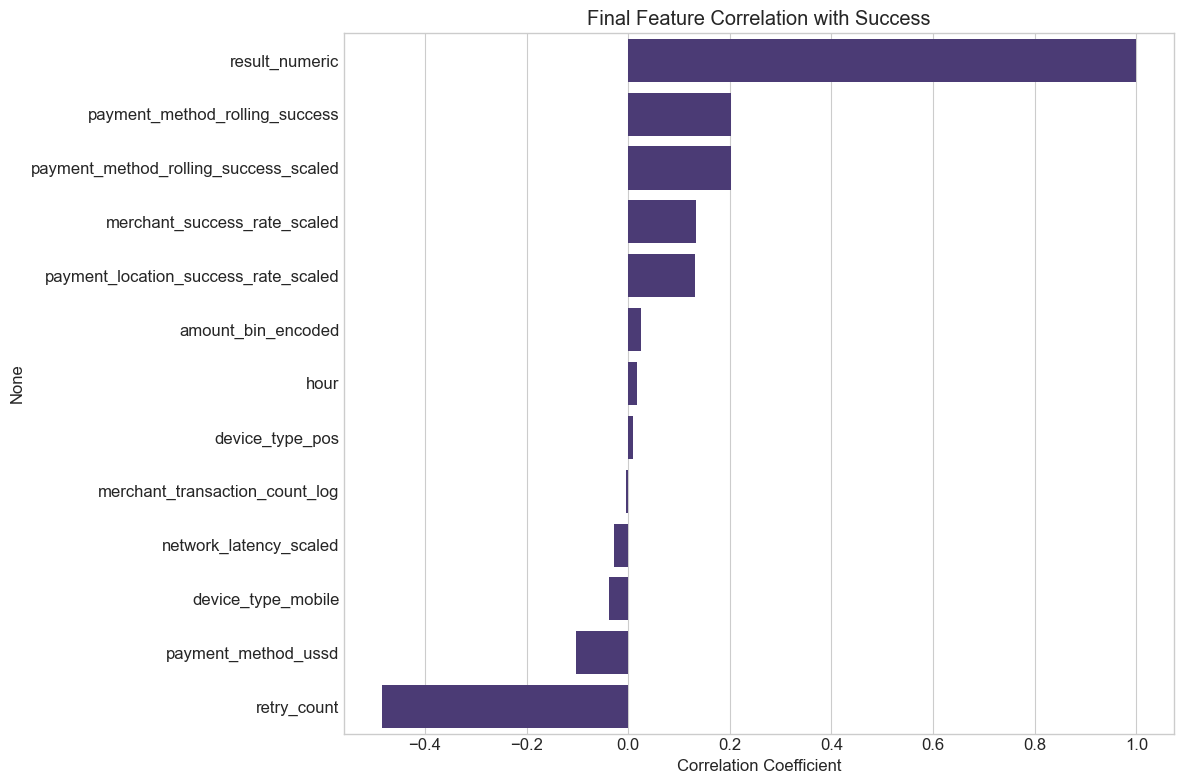


Data preprocessing and feature engineering pipeline completed!


In [55]:

print("\n=== Data Preprocessing and Feature Engineering Summary ===")
print(f"Original dataset shape: {df.shape}")
print(f"Processed dataset shape: {final_df.shape}")
print(f"Number of features selected: {len(final_features)}")
print("\nPreprocessing steps completed:")
print("- Handled missing values")
print("- Cleaned and standardized data formats")
print("- Handled outliers")
print("\nFeature engineering steps completed:")
print("- Created transaction-based features")
print("- Created time-based features")
print("- Created historical success rate features")
print("- Created network and system-based features")
print("- Created geographical and device features")
print("\nFeature selection methods applied:")
print("- Correlation analysis")
print("- SHAP value analysis")
print("- Recursive Feature Elimination")
print("\nNext steps:")
print("- Proceed with model training and evaluation")
print("- Implement model validation techniques")
print("- Develop a model deployment strategy")

# Display the correlation of the final features with the target
final_corr = final_df[final_features + ['result_numeric']].corr()['result_numeric'].sort_values(ascending=False)
print("\nCorrelation of final features with success:")
display(final_corr)

# Final visualization of feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=final_corr.values[:-1], y=final_corr.index[:-1])
plt.title('Final Feature Correlation with Success')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("\nData preprocessing and feature engineering pipeline completed!")